In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

df_city_data_to_load = pd.read_csv(city_data)
df_ride_data_to_load = pd.read_csv(ride_data)

# Combine the data into a single dataset

merge_data = pd.merge(df_city_data_to_load, 
                      df_ride_data_to_load, on="city")

# Display the data table for preview

merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


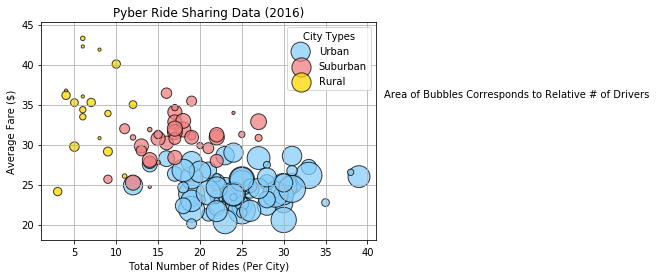

In [2]:
# Obtain the x and y coordinates for each of the three city types

grouped_city_data = merge_data.groupby(by="city",sort=False)
city_ride_count = grouped_city_data.size() #x-value
city_average_fare = grouped_city_data["fare"].mean() #y-value
driver_count = grouped_city_data["driver_count"]
city_driver_count = driver_count.mean()

# Build the scatter plots for each city types

data_no_dup = df_city_data_to_load.drop_duplicates(keep='first')
data_no_dup_just_types = data_no_dup["type"]

color = []

for data in data_no_dup_just_types:
    if data == "Urban":
        color.append("#87CEFA")
        
    if data == "Suburban":
        color.append("#F08080")
        
    if data == "Rural":
        color.append("#FFD700")
    

plt.scatter(city_ride_count, city_average_fare, marker="o",
            facecolors=color, 
            edgecolors="black",
            s=city_driver_count*10, alpha=0.75)

#created two empty plots to quickly fix/edit legend-
#after I plotted all the "types" at once

plt.scatter([], [], marker="o",
            facecolors="#F08080", 
            edgecolors="black",
            s=city_driver_count*10, alpha=0.75)
plt.scatter([], [], marker="o",
            facecolors="#FFD700", 
            edgecolors="black",
            s=city_driver_count*10, alpha=0.75)


plt.xlim(city_ride_count.min()-2, city_ride_count.max()+2)
plt.ylim(city_average_fare.min()-2, city_average_fare.max()+2)


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, which='major', axis='both')

# Create a legend

plt.legend(["Urban", "Suburban", "Rural"], title = "City Types")

# Incorporate a text label regarding circle size
plt.text(0.92, 0.62, 
         "Area of Bubbles Corresponds to Relative # of Drivers", 
         fontsize=10, transform=plt.gcf().transFigure)

# Save Figure

plt.savefig('PyberBubblePlot.pdf', bbox_inches='tight')

In [3]:
plt.show()

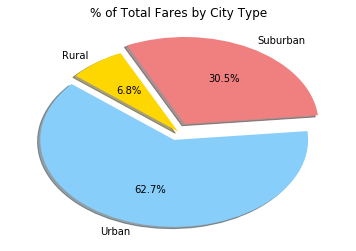

In [4]:
# Calculate Type Percents

totalFares = merge_data["fare"].sum()

grouped_type_data = merge_data.groupby(by="type",sort=False)
grouped_type_fare_percents = (grouped_type_data["fare"].sum()/totalFares)*100

# Build Pie Chart

explode1=(0.1, 0.1, 0)
colors2 = ["lightskyblue", "lightcoral", "gold"]
plt.pie(grouped_type_fare_percents, explode=explode1, 
        labels=["Urban", "Suburban", "Rural"], colors=colors2, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure

plt.title('% of Total Fares by City Type')
plt.savefig('PyberFarePiePlot.pdf', bbox_inches='tight')


In [5]:
plt.show()

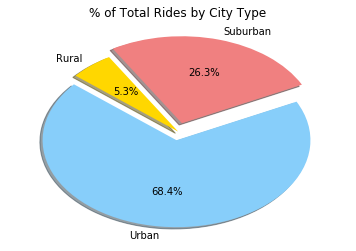

In [6]:
# Calculate Ride Percents

totalRides = len(merge_data)

grouped_type_ride_percents = (grouped_type_data["fare"].count()/totalRides)*100

# Build Pie Chart

plt.pie(grouped_type_ride_percents, explode=explode1, 
        labels=["Urban", "Suburban", "Rural"], colors=colors2, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure

plt.title('% of Total Rides by City Type')
plt.savefig('PyberRidesPiePlot.pdf', bbox_inches='tight')


In [7]:
# Show Figure
plt.show()

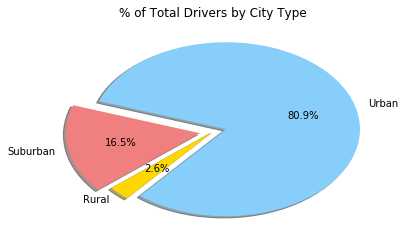

In [12]:
# Calculate Ride Percents
grouped_data_no_dup = data_no_dup.groupby(by="type",sort=False)

totalDrivers = data_no_dup["driver_count"].sum()

driver_count = grouped_data_no_dup["driver_count"]
city_driver_count = driver_count.sum()
grouped_type_driver_percents = (city_driver_count/totalDrivers)*100

# Build Pie Chart

plt.pie(grouped_type_driver_percents, explode=explode1, 
        labels=["Urban", "Suburban", "Rural"], colors=colors2, 
        autopct="%1.1f%%", shadow=True, startangle=230)

# Save Figure
plt.title('% of Total Drivers by City Type')
plt.savefig('PyberDriversPiePlot.pdf', bbox_inches='tight')


In [9]:
# Show Figure
plt.show()